In [1]:
import sys
sys.path.append('../..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qubap.qiskit.jorge.MPS import Ansatz, VQE_pretrained
from qubap.qiskit.luciano.costfunc_barren_plateaus import test_hamiltonian, test_hamiltonian_2
from qubap.qiskit.luciano.variational_algorithms import VQE, energy_evaluation
from qubap.qiskit.jorge.tools import ladder_hamiltonian

from qiskit_aer import AerSimulator

In [3]:
# Control parameters
num_qubits = 10

num_iters = 200
num_iters_training = 200

num_shots = 2**6

In [4]:
# H  = test_hamiltonian_2(num_qubits)
H = ladder_hamiltonian(num_qubits)
H

PauliSumOp(SparsePauliOp(['ZZIIIIIIII', 'ZIZIIIIIII', 'IZIZIIIIII', 'IIZZIIIIII', 'IIZIZIIIII', 'IIIZIZIIII', 'IIIIZZIIII', 'IIIIZIZIII', 'IIIIIZIZII', 'IIIIIIZZII', 'IIIIIIZIZI', 'IIIIIIIZIZ', 'IIIIIIIIZZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]), coeff=1.0)

In [5]:
backend_default = AerSimulator(shots=num_shots)

In [6]:
qc_mps  = Ansatz(num_qubits, diagonal=True)
qc_full = Ansatz(num_qubits, diagonal=False)

In [7]:
guess_naive = np.random.rand(qc_full.num_parameters) * np.pi
results_naive = VQE(H, qc_full, guess_naive, num_iters, backend_default, returns=['x', 'fx'])

In [8]:
results_trained = VQE_pretrained(H, backend_default, iters_vqe=num_iters, iters_train=num_iters_training, returns=['x', 'fx'])

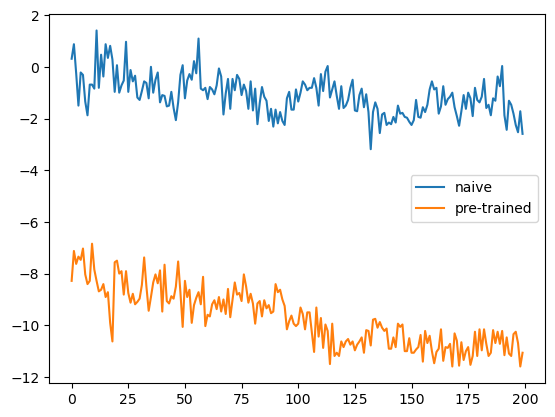

In [9]:
plt.plot(results_naive['fx'], label='naive')
plt.plot(results_trained[0]['fx'], label='pre-trained')
plt.legend(loc='best')

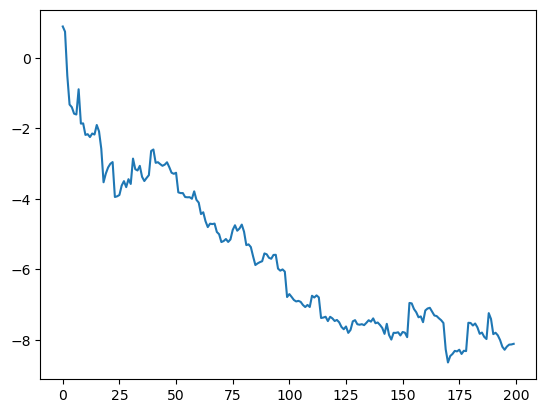

In [10]:
plt.plot(results_trained[1]['fx'])


In [11]:
from qubap.qiskit.luciano.variational_algorithms import classical_solver
classical_solver(H).eigenvalue

(-13+0j)